In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive #to import google drive data

In [3]:
drive.mount('/content/drive') #to mount the drive data into colab clound and enter the activation code

Mounted at /content/drive


In [6]:
cd /content/drive/"My Drive/Colab Notebooks/Hierarchical Clustering"

/content/drive/My Drive/Colab Notebooks/Hierarchical Clustering


In [12]:
dataset=pd.read_csv("KMeans.csv")

In [13]:
dataset

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [15]:
X=dataset.iloc[:,[1,2]].values

In [17]:
X.shape

(200, 2)

In [18]:
import scipy.cluster.hierarchy as sch

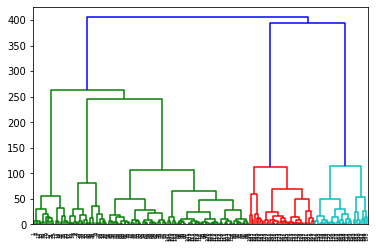

In [21]:
dendrogram=sch.dendrogram(sch.linkage(X,method='ward')) #Low Variance

In [22]:
from sklearn.cluster import AgglomerativeClustering

In [23]:
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')

In [24]:
y_hc=hc.fit_predict(X)

In [25]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

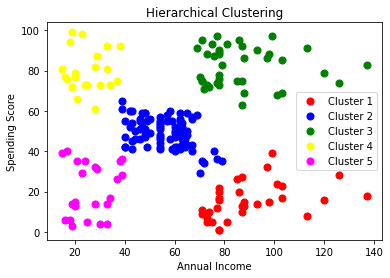

In [27]:
#Visualize the cluster
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=50,c='red',label='Cluster 1')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=50,c='blue',label='Cluster 2')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=50,c='green',label='Cluster 3')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=50,c='yellow',label='Cluster 4')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=50,c='magenta',label='Cluster 5')
plt.title('Hierarchical Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()

In [28]:
#Verifying with KMeans
from sklearn.cluster import KMeans

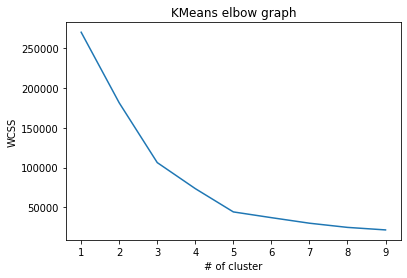

In [29]:
wcss=[] #within cluster sum of squares
for i in range(1,10):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.title('KMeans elbow graph')
plt.ylabel('WCSS')
plt.xlabel('# of cluster')
plt.show()

In [30]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(X)

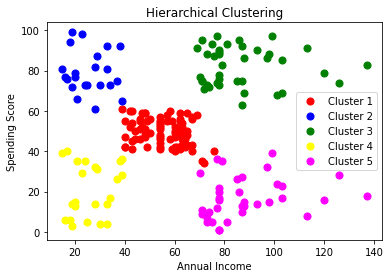

In [31]:
#Visualize the cluster
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=50,c='red',label='Cluster 1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=50,c='blue',label='Cluster 2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=50,c='green',label='Cluster 3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=50,c='yellow',label='Cluster 4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=50,c='magenta',label='Cluster 5')
plt.title('Hierarchical Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()